# Detecting Outliers

## Introduction

Outliers are data points in a population which does not belong to that population. For example, a black sheep in the herd of white sheep. 

Outliers can skew your results. Or we can say it shifts the behavior of the data from what was suppose to be true to somewhat not true results. We can call the shift as the Error. 

Error is the difference between the actual result and the predicted results. Predicted results which come from the Machine Learning model can be affected if there are unwanted data present it in. In order to make sure that the Machine Learning makes correct prediction we have to ensure that we deal with the outliers. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sns.load_dataset('diamonds'); data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data = data.fillna(data.median())

In [4]:
data_raw = data.copy()

## Building Models with any preprocessing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

In [6]:
X = data_raw.carat
y = np.log(data_raw.price)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=23, test_size=0.3)

X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [10]:
SGD = SGDRegressor(random_state=23)
SGD.fit(X_train, y_train)
SGD.score(X_train, y_train)

0.8479562194026452

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, n_estimators=10, random_state=23)
rf.fit(X_train,y_train)
rf.score(X_train, y_train)

0.9392504120631732


## Dealing with Outliers

There are several ways in which you can deal with outliers. But we take any sort of measurement to deal with outliers we should remember certain points.

1. Outliers can be good and bad as well. Basically it is subject to the problem we are facing. Some problems need oultiers or so called anomaly detection--something that deviates from the standard or normal, basically abnormal behaviour. 

2. Removing Outliers can also reduce the observation which can lead to Overfitting-- where model is too complex to learn the simplicity of the data provided. We have to ensure that the model and the data is correctly balanced. 

We will be focusing on the second point as the first point is out of scope of this article. 

Now, there are certain ways of dealing with outliers. 

1. Removing them.
- Scaling them.
- Using a non-parametric model
- Using deep neural networks

We will be covering all the points mentioned above to see which one the above method will provide us a good outcome. 

## Visualisation

Two methods shown below but the what I prefer the most is boxplot. Why? Because the boxplot shown outliers based upon the inter-quartile range which is calculated using standard deviation. 

**Standard deviation** is an important tool to find whether a population has outliers. 

<Figure size 864x720 with 0 Axes>

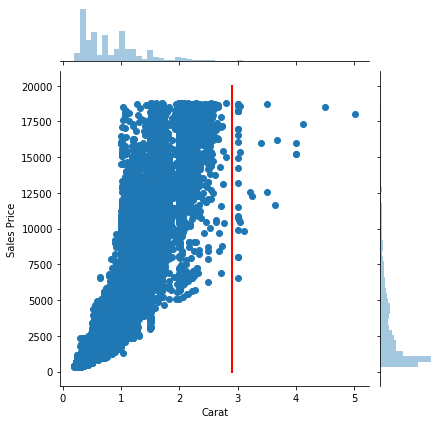

In [5]:
plt.figure(figsize=(12,10))
s1 = sns.jointplot(x="carat", y="price", data=data)
s1.ax_joint.plot([2.9, 2.9], [0, 20000], linewidth=2,color='r' )
s1.set_axis_labels(xlabel="Carat", ylabel="Sales Price")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x12112b650>,
 'caps': [<matplotlib.lines.Line2D at 0x12112bf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1211239d0>],
 'medians': [<matplotlib.lines.Line2D at 0x121132b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x121132e90>],
 'means': []}

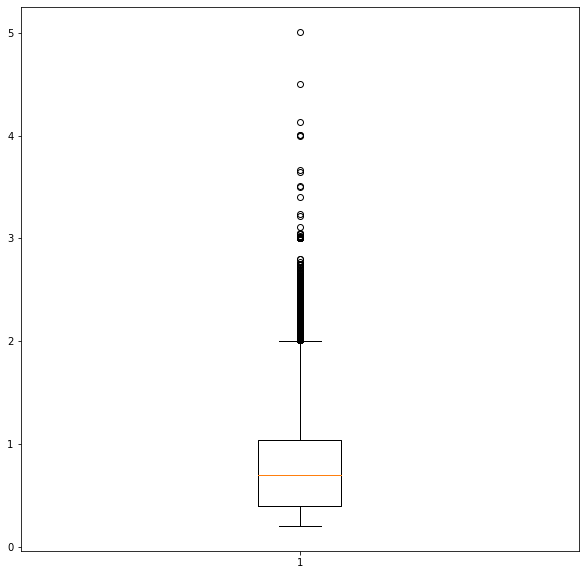

In [6]:
plt.figure(figsize=(10,10))
plt.boxplot(data.carat)

# Treatment

## Standard Deviation as a tool

The Standard Deviation is a measure of how spread out data in a space from the mean. Standard deviation is square root of variance.



![](STD.jpeg)

Usually any data beyond 3rd standard deviation is considered as an outlier. 

## Removing Outliers

We try the first method i.e. **removing the outliers** and then build a ML model to check the accuracy. The two models that we will be using is Stochastic Gradient Descent and Random Forest. 

**Note**: We will be using vanilla model i.e. a default model that sklearn already provides.

In [7]:
q25, q75 = np.percentile(data.carat, 25), np.percentile(data.carat, 75)
iqr = q75 - q25; iqr
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [x for x in data.carat if x < lower or x > upper]; print(len(outliers))

1889


In [8]:
data = data.drop(data[(data.carat > upper) | (data.carat<lower)].index)

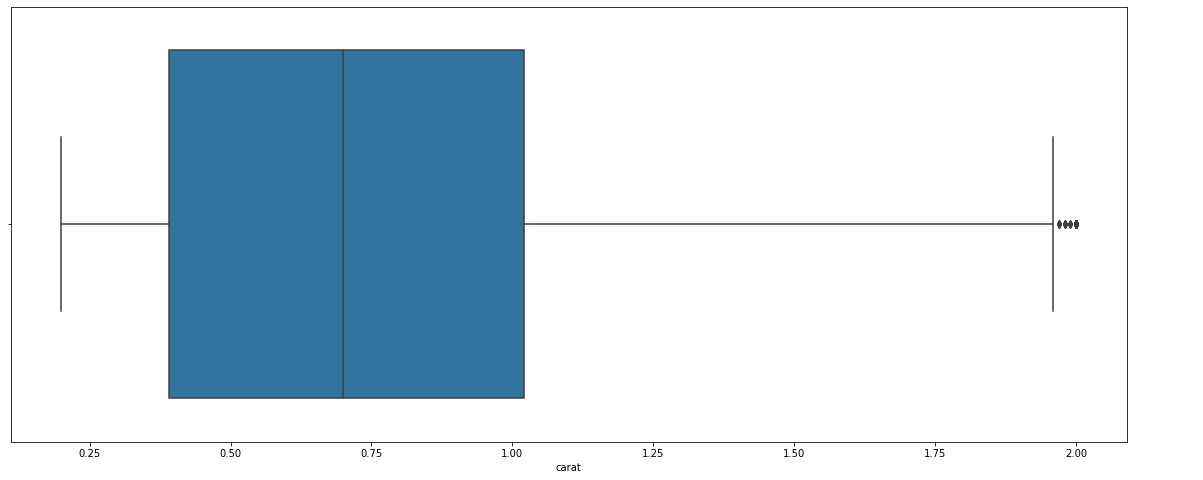

In [9]:
f,ax = plt.subplots(1, 1, figsize=(20,8))
colors = ['#B3F9C5', '#f9c5b3']
sns.boxplot(x='carat', data=data,)
ax.annotate('Extreme \n outliers', xy=(2.1,0.1),xytext=(2.1, 0.3),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x120f1e450>,
 'caps': [<matplotlib.lines.Line2D at 0x120f1ef10>,
 'boxes': [<matplotlib.lines.Line2D at 0x120f16810>],
 'medians': [<matplotlib.lines.Line2D at 0x120f28990>],
 'fliers': [<matplotlib.lines.Line2D at 0x120f28e90>],
 'means': []}

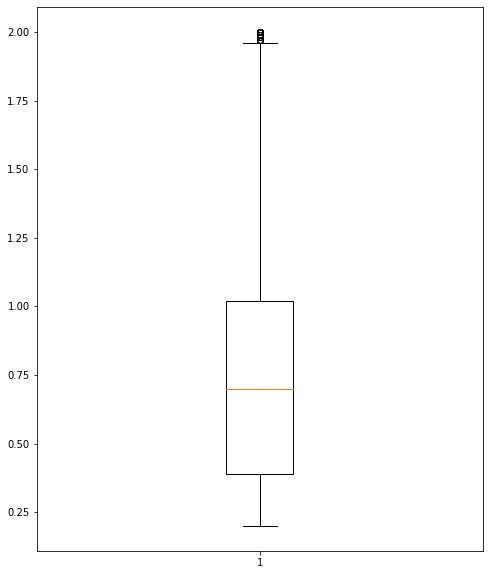

In [10]:
plt.figure(figsize=(8,10))
plt.boxplot(data.carat)

## Working with univariant dataset

In [11]:
X = data.carat
y = np.log(data.price)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=23, test_size=0.3)

X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

## Linear Model

In [14]:
from sklearn.linear_model import SGDRegressor

In [15]:
SGD = SGDRegressor(random_state=23)

In [16]:
SGD.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=23,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [17]:
SGD.score(X_train, y_train)

0.8814293026043725

## Non-parametric model -- Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=10, random_state=23)
rf.fit(X_train,y_train)
rf.score(X_train, y_train)

0.93255480422885

## Checking the Performance 

If the test accuracy is less than training accuracy is it overfitting. i.e. the model is too complex learn the simplicity of the data.

If the training accuracy itself is very less below 70 then we can say that the model is underfitting i.e. the model is too simple to learn the complex data. But it seems that our model is just fine not to be considered in the underfitting category. 


Hence, we will check for overfitting. 

We will be using Root Mean Square Error to check the score between the training set and the testing set. 


In [20]:
import math
def rmse(X,y): return math.sqrt(((X-y)**2).mean())

def print_score(model):
    return [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test), 
     model.score(X_train, y_train), model.score(X_test, y_test)]

In [21]:
print('The scores for Stochastic Gradient Descent are: ',print_score(SGD)) #Perfect model
print('The scores for Random Forest are: ',print_score(rf))

The scores for Stochastic Gradient Descent are:  [0.33437466833442886, 0.33492309110522206, 0.8814293026043725, 0.8808833158341957]
The scores for Random Forest are:  [0.2521855459326567, 0.25436238295812885, 0.93255480422885, 0.9312950253266471]


In [22]:
 #Perfect model

## Scaling the dataset

Since we have already detected that the outliers are present in the dataset. We will using scaling techniques accordingly and then we will build a ML model and then check the accuracy. 

There are 

**Note**: We will be using the vanilla here as well. Since our aim is not to discover the model but rather the technique which makes the model perform better. 

In [23]:
from sklearn.model_selection import train_test_split

X, y = data_raw.carat, np.log(data_raw.price)

from sklearn.preprocessing import RobustScaler


scaling = RobustScaler()

X = scaling.fit_transform(np.array(X).reshape(-1,1))


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=23, test_size=0.3)

X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

## Linear Model

In [24]:
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor(random_state=23)
SGD.fit(X_train, y_train)
SGD.score(X_train, y_train)

0.8475738040346006

## Non-parametric model -- Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, n_estimators=10, random_state=23)
rf.fit(X_train,y_train)
rf.score(X_train, y_train)

0.9392503939398784

## Checking the Performance

In [26]:
print('The scores for Stochastic Gradient Descent are: ',print_score(SGD))
print('*'*20)
print('The scores for Random Forest are: ',print_score(rf))

The scores for Stochastic Gradient Descent are:  [0.3968648110452676, 0.3995578537520062, 0.8475738040346006, 0.8435787127417848]
********************
The scores for Random Forest are:  [0.2505442962295736, 0.2532557461978344, 0.9392503939398784, 0.9371572577031487]


## Using Neural Networks

Neural Networks are state of art mathematical model inspired from the functionality of the brain to make predictive models and to find the underlying structure of the data. 

We will building two Neural Networks. Both the Deep Learning model will differ in terms of activation function. We will compare how they perform against each other.  

The goal here is to see which which model is robust to outliers. 

## Vanilla Neural Nets

In [27]:
X,y = data_raw.carat, np.log(data_raw.price)

from sklearn.model_selection import train_test_split

train_x, X_test, train_y, y_test = train_test_split(X,y, random_state=23, test_size=0.3)

X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, random_state=23, test_size=0.3)

In [28]:
import keras
from keras.models import Sequential

Using TensorFlow backend.


In [29]:
X_train = np.array(X_train).reshape(-1,1)
X_valid = np.array(X_valid).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [30]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="sigmoid", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 26430 samples, validate on 11328 samples
Epoch 1/20
26430/26430 [==============================] - 2s 74us/step - loss: 1.2168 - val_loss: 0.8599
Epoch 2/20
26430/26430 [==============================] - 2s 70us/step - loss: 0.7899 - val_loss: 0.7156
Epoch 3/20
26430/26430 [==============================] - 2s 79us/step - loss: 0.6466 - val_loss: 0.5753
Epoch 4/20
26430/26430 [==============================] - 2s 93us/step - loss: 0.5215 - val_loss: 0.4604
Epoch 5/20
26430/26430 [==============================] - 2s 57us/step - loss: 0.4161 - val_loss: 0.3660
Epoch 6/20
26430/26430 [==============================] - 1s 47us/step - loss: 0.3319 - val_loss: 0.2939
Epoch 7/20
26430/26430 [==============================] - 1s 48us/step - loss: 0.2687 - val_loss: 0.2410
Epoch 8/20
26430/26430 [==============================] - 2s 59us/step - loss: 0.2243 - val_loss: 0.2039
Epoch 9/20
26430/26430 [==============================] - 1s 55us/step - loss: 0.1951 - val_loss: 0.1812
Epoch

In [31]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

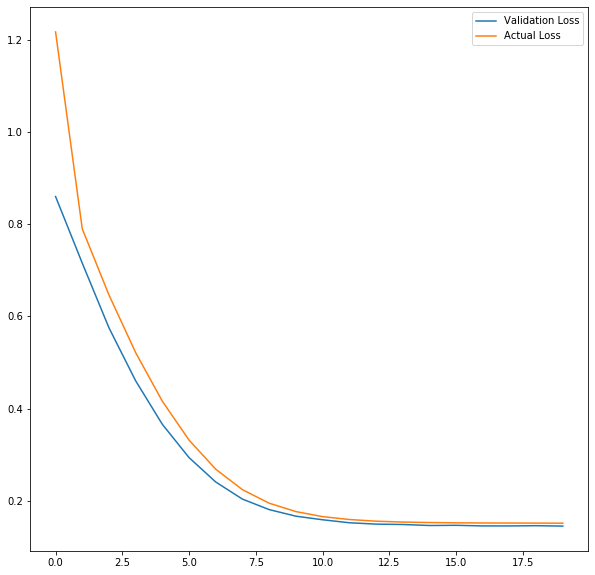

In [32]:
plt.figure(figsize=(10,10))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Actual Loss')
plt.legend()
plt.show()

## Convolutional Neural Networks

In [33]:
cnnSeq = keras.models.Sequential()

cnnSeq.add(keras.layers.Dense(300, kernel_initializer="he_normal", input_shape=X_train.shape[1:]))
cnnSeq.add(keras.layers.LeakyReLU())
cnnSeq.add(keras.layers.Dense(1))


In [34]:
cnnSeq.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = cnnSeq.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = cnnSeq.evaluate(X_test, y_test)

Train on 26430 samples, validate on 11328 samples
Epoch 1/20
26430/26430 [==============================] - 2s 67us/step - loss: 3.8384 - val_loss: 0.4001
Epoch 2/20
26430/26430 [==============================] - 2s 80us/step - loss: 0.1740 - val_loss: 0.1392
Epoch 3/20
26430/26430 [==============================] - 1s 46us/step - loss: 0.1477 - val_loss: 0.1335
Epoch 4/20
26430/26430 [==============================] - 1s 46us/step - loss: 0.1425 - val_loss: 0.1285
Epoch 5/20
26430/26430 [==============================] - 1s 45us/step - loss: 0.1368 - val_loss: 0.1305
Epoch 6/20
26430/26430 [==============================] - 1s 44us/step - loss: 0.1314 - val_loss: 0.1204
Epoch 7/20
26430/26430 [==============================] - 1s 48us/step - loss: 0.1259 - val_loss: 0.1144
Epoch 8/20
26430/26430 [==============================] - 1s 46us/step - loss: 0.1214 - val_loss: 0.1231
Epoch 9/20
26430/26430 [==============================] - 1s 44us/step - loss: 0.1175 - val_loss: 0.1064
Epoch

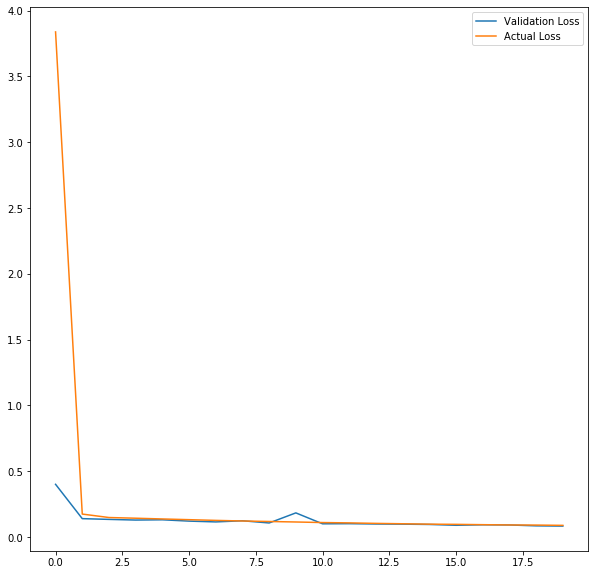

In [35]:
plt.figure(figsize=(10,10))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Actual Loss')
plt.legend()
plt.show()

# Conclusion

- Removing the outliers can cause reduction of observation causing the model to loose important data points which can be vital to make relationship between the independent variable and dependent variable. 

- Scaling is a better option when it comes to reducing the effects of outliers. In that also we should use **Robust Scalar** because it works best when it comes to working with outliers. 
    - Other scaling methods are also available there like Standard Scalar, Min-Scalar, Normalisation and so forth. Read this article to know more about Scaling methods. 
    
- We also found that Parametric model and non-parametric model works best when the outliers are scaled and not removed. But this is subjective to the problem that you are dealing with. 
    - If dataset is masive with lot of features then it is better if we remove the outliers. 
    - If outliers are present in finite features in a infinite dataset then it is better to remove outliers
    - If dataset is small then it is better to scale the outliers. 
    - If your whole process is based on studying the effect of outliers then probably you should not remove outliers. 


- Deep Neural Networks are less prone to outliers, especially if we take care of the activation functions. 
    - We found that the Neural Networks with Leaky Relu learns quickly than Sigmoid activation function. 
    
    
**Note**: Our aim was not to design a complex model but to design and build a model **to understand the effects of removing outliers and scaling the outliers** and also to obverse which models makes the best relationship between the independent and dependent variables. 

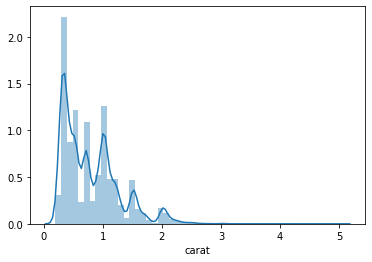

In [37]:
sns.distplot(X)

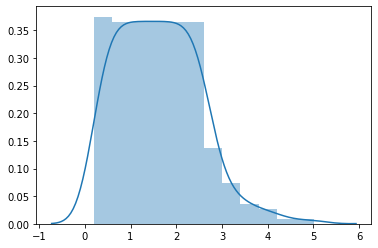

In [43]:
sns.distplot(X.unique())